<a href="https://colab.research.google.com/github/kusuraj-08/SHALA2020/blob/master/covid'19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [0]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

In [0]:
print("Size/shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking data-type",covid.dtypes)

In [0]:
covid.drop(["SNo"],1,inplace=True)

In [0]:
covid.isnull().sum()

In [0]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [0]:
covid["ObservationDate"]

In [0]:
#Grouping different types of cases as per the date
datawise=covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datawise

In [0]:
print("Basic Information")
print("Total number of confirmed cases around the world",datawise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datawise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datawise["Deaths"].iloc[-1])
print("Total no. of active cases around the world",(datawise['Confirmed'].iloc[-1]-datawise['Recovered'].iloc[-1]-datawise["Deaths"].iloc[-1]))
print("Total no. of closed cases around the world",(datawise['Recovered'].iloc[-1]+datawise["Deaths"].iloc[-1]))

In [0]:
plt.figure(figsize=(15,5))
sns.barplot(x=datawise.index.date, y=datawise['Confirmed']-datawise['Recovered']-datawise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

Text(0, 0.5, 'Weakly Progress of different types of cases')

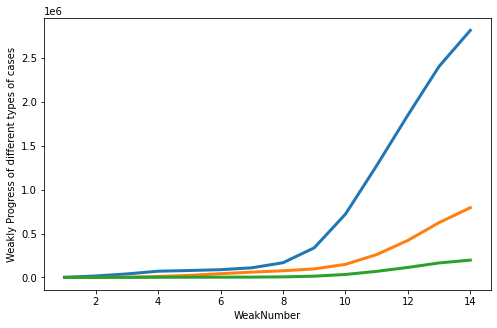

In [28]:
datawise['WeekofYear']=datawise.index.weekofyear
weak_num=[]
weakwise_confirmed=[]
weakwise_recovered=[]
weakwise_deaths=[]
w=1
for i in list(datawise["WeekofYear"].unique()):
  weakwise_confirmed.append(datawise[datawise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weakwise_recovered.append(datawise[datawise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weakwise_deaths.append(datawise[datawise["WeekofYear"]==i]["Deaths"].iloc[-1])
  weak_num.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(weak_num,weakwise_confirmed,linewidth=3) 
plt.plot(weak_num,weakwise_recovered,linewidth=3) 
plt.plot(weak_num,weakwise_deaths,linewidth=3)  
plt.xlabel("WeakNumber")
plt.ylabel("Weakly Progress of different types of cases")

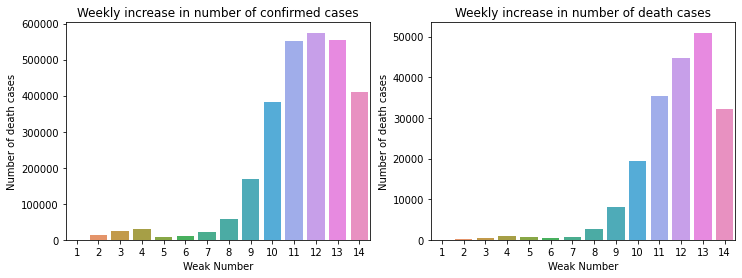

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=weak_num,y=pd.Series(weakwise_confirmed).diff().fillna(0),ax=ax1)
#sns.barplot(x=weak_num,y=pd.Series(weakwise_recovered).diff().fillna(0),ax=ax1)
sns.barplot(x=weak_num,y=pd.Series(weakwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Weak Number")
ax2.set_xlabel("Weak Number")
ax1.set_ylabel("Number of death cases")
ax2.set_ylabel("Number of death cases")
ax1.set_title("Weekly increase in number of confirmed cases")
ax2.set_title("Weekly increase in number of death cases")
plt.show()


In [0]:
print("Average increase in number of Confirmed cases everyday:",np.round(datawise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datawise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday:",np.round(datawise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(10,5))
plt.plot(datawise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datawise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datawise["Deaths"].diff().fillna(0),label="Daily increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increases")
plt.title("Daily increases")
plt.legend()
plt.xticks(rotation=90)

In [0]:
#country wise analysis
#Calculating Country wise Mortality rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Mortality"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countires as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countires as per number of deaths cases")

In [0]:
#Data Analaysis for India
india_data= covid[covid["Country/Region"]=="India"]
datawise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datawise_india.iloc[-1])
print("Total Active Cases",datawise_india["Confirmed"].iloc[-1]-datawise_india["Recovered"].iloc[-1]-datawise_india["Deaths"].iloc[-1])
print("Total Closed cases",datawise_india["Recovered"].iloc[-1]+datawise_india["Deaths"].iloc[-1])

In [0]:
#Data Analaysis for US
Us_data= covid[covid["Country/Region"]=="US"]
datawise_us=Us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datawise_us.iloc[-1])
print("Total Active Cases",datawise_us["Confirmed"].iloc[-1]-datawise_us["Recovered"].iloc[-1]-datawise_us["Deaths"].iloc[-1])
print("Total Closed cases",datawise_us["Recovered"].iloc[-1]+datawise_us["Deaths"].iloc[-1])

In [0]:
datawise_india['WeekofYear']=datawise_india.index.weekofyear
weak_num_india=[]
weakwise_confirmed=[]
weakwise_recovered=[]
weakwise_deaths=[]
w=1
for i in list(datawise_india["WeekofYear"].unique()):
  weakwise_confirmed.append(datawise_india[datawise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weakwise_recovered.append(datawise_india[datawise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  weakwise_deaths.append(datawise_india[datawise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  weak_num_india.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(weak_num_india,weakwise_confirmed,linewidth=3) 
plt.plot(weak_num_india,weakwise_recovered,linewidth=3) 
plt.plot(weak_num_india,weakwise_deaths,linewidth=3)  
plt.xlabel("WeakNumber")
plt.ylabel("Weakly Progress of different types of cases")